# Fundamentals of Data Science - STAT 411

We start with some examples of the kinds of problems we will consider in this class. I am calling these motivating problems because we will return to them again and again as class goes on.

Please read the syllabus. We will not take time to go over it entirely here. You should have an email from me with:
1. The syllabus as an HTML file,
2. A link to Github for our class, 
3. A link inviting you to join the Slack channel for our class, and 
4. A link to a survey asking for some information from you.

Before we get started with the statistics, some preliminaries:

## Anaconda, Jupyter, and Python

We will be using Jupyter and Python for class. Python is a programing language, Jupyter is a shell for intereacting with it and creating nice files, and Anaconda is a distribution that will install both systems for you and manage most of the packages we need.

Some details:
- [You will need to download and install Anaconda from this website](https://www.anaconda.com/)
- You will then need to go into the package manager under *Environments* and install pandas, seaborn, and scikitlearn. If your Jupyter is updated during class you will need to install these pakcages again.

Truthfully, when mine gets updated I often find it easier to just reinstall Anaconda and start over.

## Github

[All of the course materials, including the syllabus, will be in the Github repository for our class, available here](https://github.com/virgilpierce/STAT_411). This is a public repository. There are three ways to use it to get the course files. You can download the course as a .zip file, you can create a Github account and clone it yourself, and finally you could create a Github account and make a pull request for it. It will be updated as class goes on, so you may want to get in a habit of regularly making a new Fetch.

Later in class we will cover how to use Github with your team for versioning control.

I will accept, and be grateful for, commit requests from you to fix typos in the course files, or you can add them to the "issues" tab in Github. You will also notice that I am tracking some issues there.

## Python

The course will use a lot of Python, however I am not assuming you already know it. We will have example files to start from, and it is generally a speaking an easy yet powerful language to learn. You have my permission to stop us at any point and ask any question about Python you want.

### Why Python

There is a fair amount of debate about whether Data Science should be taught with Python, R, or some other language. Here is why I am using Python and asking you to use it, however as I say this is not a settled question.

- Python is realitvely easy to learn. It is a language for which readability counts,
- Python is highly used in Mathematics, Statistics and Science. It is generally more broadly applicable than R,
- It is widely used in industry for Data Science and other computations,
- It is my assertion that if you learn Data Science with Python, you will easily be able to pick up R if you find yourself in a shop that uses it,
- The bulk of my experience with Data Science has been through Python,
- I want the class to understand what you are doing, so we need to fix the language the whole class uses.



## Some Prelimaries

In [3]:
# We will typically need four modules

import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library

In [4]:
# If you are new to Python these commands are loading external module files that 
# contain list of commands we need. The commands are accessed by the <name of module>.<name of command>
# For example

np.sqrt(9)

# Pulls the sqrt() function from the numpy package. I am using the alias np for numpy (from the 'as np')
# to save myself three letters each time I use a numpy command. 

3.0

Note what happened here:

- The "#" characters represent comment lines - they are not read by the interpreter,
- In Jupyter the last executed line of a cell is cycled through the print() function and displayed as nice output.

### Getting Help

First there is inline help from two functions:

In [4]:
# Adding a question mark after a command gives us an overview of that command

list?

Init signature: list(iterable=(), /)
Docstring:     
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
Type:           type
Subclasses:     _HashedSeq, StackSummary, SList, _ImmutableLineList, FormattedText, NodeList, _ExplodedList, Stack, _Accumulator, _ymd, ...


In [5]:
# the dir() function lists attributes a function has:
# However many of the attributes are so-called system attributes and not very helpful. 
# I typically ask Python to drop them using a simple list comprehension.

[x for x in dir(list) if not '__' in x]

# You can read this command in English: [] - make a list; of elements x for each x in 
# dir(list) if x does not contain the string '__'

['append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

What we get is a list of commands that can apply to a list in Python.

Then there is google help. Particularly if you are using one of the packages like seaborn, there is extensive online documentation about how it works. Just look. Most problems can be resolved in a few minutes.

I have reference books, but my warning to you is not to spend to much money on them. The online help has more detail, and in my experience the books will never have the right details - you end up using the inline and online help more.

## First Motivating Example - Baseball Players

Before we get to far, lets look at an example to see what we are aiming at in this class. Consider the dataset of Major League Baseball Players height and weight.

In [6]:
# Read in the major league players data set

major = pa.read_csv('Data Sets/Major League Height-Weight.csv')   # creates a pandas Dataframe from a .csv file

# Each row of a data frame is a data point - in this case a player.
# Each column is a feature about the data point (its coordinates if you will)

major.head()   # displays the first few rows

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Note that in order to be following along here and executing the code, you will have to have downloaded the notebook file as well as the Data Set file, and kept them in the same relative directories. I really suggest just cloning the whole repository.

In [7]:
# Rename the Height and Weight columns so it is easier to refer to them.

major = major.rename({'Height(inches)':'Height', 'Weight(pounds)':'Weight'}, axis=1)  

# This is using a dictionary {'old name':'new name' } to change the names
# axis = 1 tells it we are changing columns
# axis = 0 would tell it we were changing rows

major.tail()  # displays the last few rows

,Name,Team,Position,Height,Weight,Age
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01
1033,Josh_Kinney,STL,Relief_Pitcher,73,195.0,27.92


In [8]:
# We can grab an individual row:

major.loc[500]

# Note we get more information than just the factors for this player.

Name         T.J._Bohn
Team               ATL
Position    Outfielder
Height              77
Weight             200
Age              27.12
Name: 500, dtype: object

In [14]:
# We can grab a subset of the columns

major.loc[:, ['Name', 'Height']]

,Name,Height
0,Adam_Donachie,74
1,Paul_Bako,74
2,Ramon_Hernandez,72
3,Kevin_Millar,72
4,Chris_Gomez,73
5,Brian_Roberts,69
6,Miguel_Tejada,69
7,Melvin_Mora,71
8,Aubrey_Huff,76
9,Adam_Stern,71


**First Way Data Science is not Statistics:** We will use ONLY real data in this class. Real data is messy. 

Our first data set is missing a value for one of the players:

In [8]:
major[pa.isna(major.Weight)]    # pa.isna(major.Weight) gives a list of True or False values, True is 
                                    # for a player (row) that is missing a value for the Weight feature (column)

,Name,Team,Position,Height,Weight,Age
640,Kirk_Saarloos,CIN,Starting_Pitcher,72,NaN,27.77


For now it is probably simplest to just not use this player in our analysis. But generally we should ask: What should we do with missing data?

In [9]:
major = major.drop(640, axis=0)    # Remove row 640 (note axis = 0 for 'row')

In [10]:
# Check the size of our dataframe

major.shape  # Our dataframe has 1033 players (rows) and 6 features (columns)

# We will **OFTEN** be thinking about the dataframe as a matrix, hence the rows x columns language.

(1033, 6)

### First Question

What are the relationships between the numeric features of the players?

We start by just consider the histograms and scatter plots for the numerical features.

We will use the seaborn package usually for plots. [I have found the online help available here to be very helpful](https://seaborn.pydata.org/).

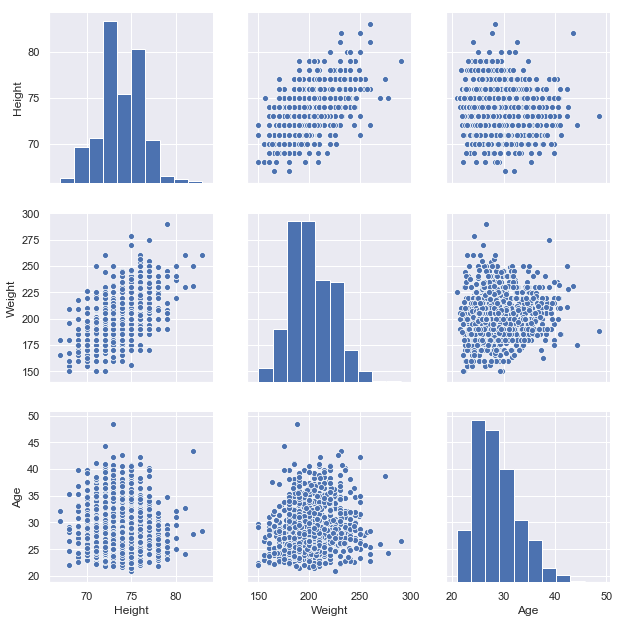

In [16]:
# Make a plot of the dataset by pairs for the numerical data

sn.set(style = 'darkgrid')   # seaborn makes nice looking plots - check the galleries for the various options

p = sn.pairplot(major)   

# Note that seaborn.pairplot will ignore categorical data (like position) unless we pass it an option.


p.fig.set_size_inches(9, 9)  

# My one major frustration with seaborn is that changing the size of a plot or figure depends
# on what plotting command you happen to be using. There is no one way to do it. However the
# plots it makes are generally so nice, that I just deal with it.

# In any case, depending on the size of the monitor you are viewing this on, you may need to adjust
# the (10, 10) above to something else.

In the figures above:
- on the diagonal: each player is a box in one of the bars.
- on the off diagonals: each player is one of the dots.

There is a lot to notice here, and we will be coming back to this dataset again and again.

I want to point out two things right away. It is not clear, from the historgrams for the three features (Height, Weight, and Age) that the distributions are normal - Age in particular appears to be definitely not normal.

### Second Question

We might ask, how does a player's height or weight depend on the position they play?

In [12]:
set(major.Position)   # Make a set of all of the positions (eliminates duplicates)

# Note there are two ways to get the values for a feature. 
# major.Position 
# or major.loc[:, 'Position']

# Actually there is a third way. Note that 'Position' is third feature, so we can find it with:
# major.iloc[:, 2]
# iloc means locating entries by 'Integer Index' rather than actual tag.

{'Catcher',
 'Designated_Hitter',
 'First_Baseman',
 'Outfielder',
 'Relief_Pitcher',
 'Second_Baseman',
 'Shortstop',
 'Starting_Pitcher',
 'Third_Baseman'}

In [18]:
# We are going to make a dictionary of key:value pairs to recode the Position feature to 
# 'Pitcher' and 'Not Pitcher'

pos_dict = {}  # Make an empy dictionary
for x in list(set(major.Position)):  # Sets are not iterable objects, so we convert the positions to a list
    
    if 'Pitcher' in x:    # If the position is one of the types of Pitchers
        pos_dict.update({x:'Pitcher'}) # add the x:'Pitcher' key:value pair to our dictionary
    else:
        pos_dict.update({x:'Not Pitcher'})  # otherwise add the x:'Not Pitcher' pair.
        
major_2 = major.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to major_2 will change major
    
major_2.Position = major_2.Position.map(pos_dict)  # use the dictionary we made to recode the values with .map()

major_2 # print the dataframe to check if there is a problem

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Not Pitcher,74,180.0,22.99
1,Paul_Bako,BAL,Not Pitcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Not Pitcher,72,210.0,30.78
3,Kevin_Millar,BAL,Not Pitcher,72,210.0,35.43
4,Chris_Gomez,BAL,Not Pitcher,73,188.0,35.71
5,Brian_Roberts,BAL,Not Pitcher,69,176.0,29.39
6,Miguel_Tejada,BAL,Not Pitcher,69,209.0,30.77
7,Melvin_Mora,BAL,Not Pitcher,71,200.0,35.07
8,Aubrey_Huff,BAL,Not Pitcher,76,231.0,30.19
9,Adam_Stern,BAL,Not Pitcher,71,180.0,27.05


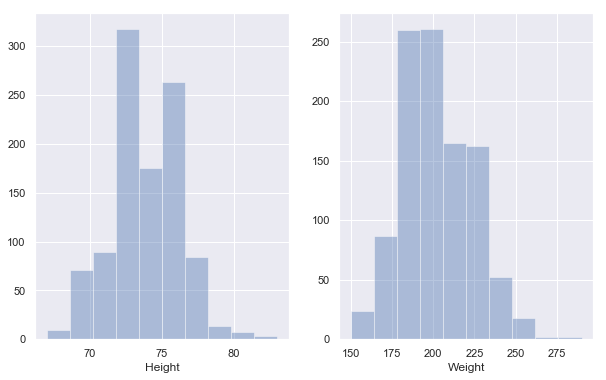

In [14]:
# Make a histogram of the heights and weights

sn.set(style = 'darkgrid')  # Set the style

f, ax = plt.subplots(1, 2, sharey=False, figsize = (10, 6))   # Make a 1 x 2 grid for multiple plots
sn.distplot(major_2.Height, ax=ax[0], kde=False, bins=10)  
sn.distplot(major_2.Weight, ax=ax[1], kde=False, bins=10);

# These are (mostly) copies of the corresponding histograms from the facet-grid above;
# Do you notice the difference?

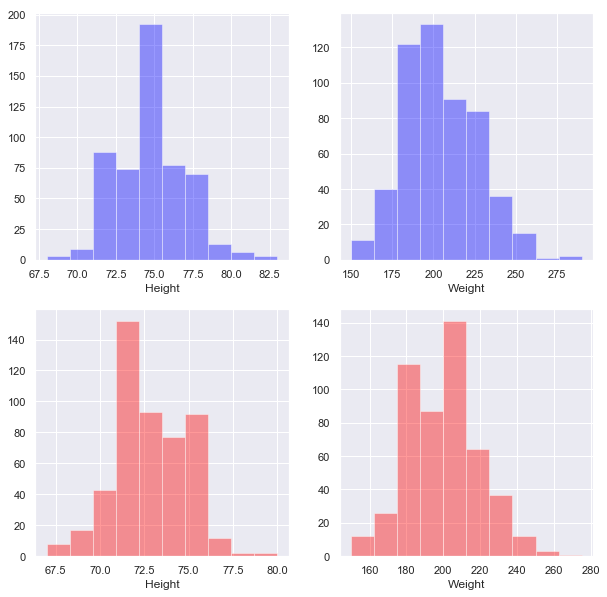

In [15]:
# Make them again but by player position also

sn.set(style = 'darkgrid') 

f, ax = plt.subplots(2, 2, sharey=False, figsize = (10, 10))   # Make a 2 x 2 grid for multiple plots
sn.distplot(major_2[major_2.Position=='Pitcher'].Height, ax=ax[0, 0], color = 'blue',
            label = 'Pitchers', kde=False, bins=10)  
sn.distplot(major_2[major_2.Position=='Pitcher'].Weight, ax=ax[0, 1], color = 'blue', 
            label = 'Pitchers', kde=False, bins=10)
sn.distplot(major_2[major_2.Position!='Pitcher'].Height, ax=ax[1, 0], color = 'red', 
            label = 'Non Pitchers', kde=False, bins=10)
sn.distplot(major_2[major_2.Position!='Pitcher'].Weight, ax=ax[1,1], color = 'red', 
            label = 'Non Pitchers', kde=False, bins=10);

# First row are Pitchers
# Second row are Non-Pitchers
# I am a little annoyed the label did not come through - Adding this as an issue in Github

# Also I would like to have the horizontal axis shared in the first two but not the same axis for all four - Not sure
# that will ever be possible.

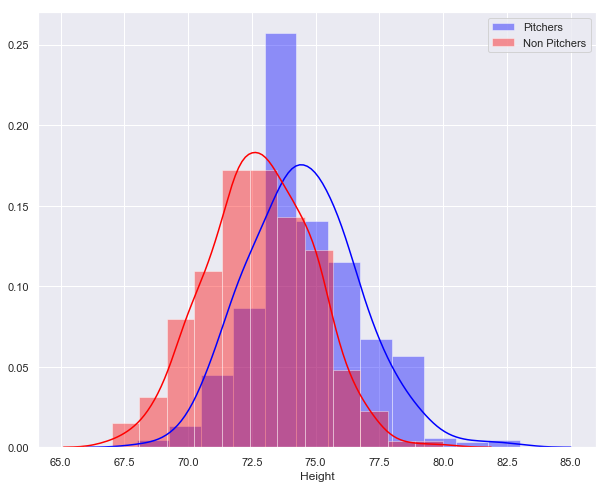

In [16]:
# We could also plot two histograms on top of each other

sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(major_2[major_2.Position=='Pitcher'].Height, color='blue', 
            label='Pitchers', kde=True, bins=12) 
sn.distplot(major_2[major_2.Position!='Pitcher'].Height, color='red', 
            label='Non Pitchers', kde=True, bins=12)
plt.legend();

# I changed the kde flag to True - this gives a curve estimating the distribution,
# but it also scales the histograms to have area 1 (i.e. they represent proportions of the populations)

In [17]:
# We can easily compute the means and variances for the two categories

print('Pitchers Mean Height: {0:.2f}'.format(major_2[major_2.Position == 'Pitcher'].Height.mean()))
print('Pitchers Variance in Height (Mean Square Height Differences from Mean Height): {0:.2f}'.format(
    major_2[major_2.Position == 'Pitcher'].Height.var()))

# Note: If you are new to Python - I am using a print command to get the output with a reminder 
# of what it means. I like the .format() method myself for making strings. I use it for my 
# print() commands mostly because I'm still learning how to do things and it is helping me learn
# how the .format() method works to use it in lots of situations.

# here the {0:.2f} means to display the number with two decimal places of accuracy after the .

# Remove the f and rerun the command if you are curious what it means.

print('Non-Pitchers Mean Height: {0:.2f}'.format(major_2[major_2.Position != 'Pitcher'].Height.mean()))
print('Non-Pitchers Variance in Height (Mean Square Height Difference from Mean Height): {0:.2f}'.format(
    major_2[major_2.Position != 'Pitcher'].Height.var()))

Pitchers Mean Height: 74.52
Pitchers Variance in Height (Mean Square Height Differences from Mean Height): 4.95
Non-Pitchers Mean Height: 72.82
Non-Pitchers Variance in Height (Mean Square Height Difference from Mean Height): 4.22


### Review of Main Statistics Technique

There are two primary methods of proceeding you may have learned in earlier (more traditional) statistics classes. We will discuss below why we will not ask this question very often but today it is a nice warm up.

#### Hypothesis Test

Null Hypothesis:  The heights of pitchters are from the same distribution as the heights of non-pitcheers.

Alternative Hypothesis: The heights of pitchers are from a different distribution as the heights of non-pitchers.

We will use the two-sample T-test as we are using samples from both populations. We will also assume our populations' heights are normally distributed.

In [18]:
from scipy.stats import ttest_ind  # We need to import the test 
                                   # (we will not do this often, so I keep it separate from our standard header)
    
# Also note that Python will not import it again unless we quit the kernel (an important thing to remember if you 
# ever write your own modules)

mean_p = major_2[major_2.Position == 'Pitcher'].Height.mean()
mean_np = major_2[major_2.Position != 'Pitcher'].Height.mean()

std_p = major_2[major_2.Position == 'Pitcher'].Height.std()
std_np = major_2[major_2.Position != 'Pitcher'].Height.std()

ttest,pval = ttest_ind(major_2[major_2.Position == 'Pitcher'].Height, major_2[major_2.Position != 'Pitcher'].Height)
print("p-value",pval)

p-value 7.833714801582736e-35


A very small p-value, and we can with confidence reject the Null Hypothesis. 

#### Confidence Intervals

Sometimes a more instructive computation is the confidence interval for the mean pitcher's heights. 

In [19]:
import statsmodels.stats.api as sms

print("Confidence Interval for Mean of Pitchers' Heights: {}".format(
    sms.DescrStatsW(major_2[major_2.Position=='Pitcher'].Height).tconfint_mean(0.99)))

print("Confidence Interval for Mean of Non-Pitchers' Heights: {}".format(
    sms.DescrStatsW(major_2[major_2.Position!='Pitcher'].Height).tconfint_mean(0.99)))

Confidence Interval for Mean of Pitchers' Heights: (74.52028913347395, 74.52270152073164)
Confidence Interval for Mean of Non-Pitchers' Heights: (72.81410735354739, 72.81641473480603)


### What is Data Science

or 

### Why Data Science

Notice - we showed (up to some assumptions) above that the distribution of the heights of pitchers is different from that of non-pitchers. In particular we can now say that the mean height of Pitchers is higher than that of non-Pitchers. 

However there are three problems with the traditional approach:

1. Hypothesis testing requires us to know (or assume) the distribution of players' heights. 
2. Hypothesis testing requires us to use the data to estimate the parameters of the distribution of players' heights.

These are not theoretical concerns:  Note there are some classic examples of samples taken from different distributions that have the same means and standard deviations. 

These problems become worse the larger the dimension we work with - the more features we include. This is called the curse of dimensionality:  Suppose we had n data points estimating a distribution in one dimension. The amount of data we need in order to be as certain of our estimates of a distribution for dimension d, is proportional to $ n^d $.

3. The question we answered with the T-test or Confidence Interval computation is not really very instructive. 

Pitchers are, on the mean, taller. But that does not tell us necessarily given a players height (and weight and age) whether they are likely to be a pitcher or not. In other words, what we have is a rather blunt instrument: Given that a player is a pitcher, we have an estimate of their height. We could give an interval estimate for an individuals height and vary it to balance the Type 1 and Type 2 errors.

4. Maybe a 4th problem: We have only used 1/3 of the numerical data we had about players.

While generally speaking we do not just want to use all of the data just because we have it, we will discuss the downsides later, we do though want to consider whether the data we have helps clarify the question.

### A World of Data and a World of Computation

Two things have been happening over the last decades that promise to rescue us from the curse of dimensionality and simmultaneously free us from having to assume the distrubtion in statistical questions. 

- Data has become **VERY** cheap

High dimensional data (data with lots of features) is now (sometimes) really easy and cheap to collect, and to collect in ways that computers can use (even on the fly). We will look at some methods of collecting data.

- Computational power has become **VERY** cheap

You can rent time on Google Cloud or the Amazon Web Servers for small fractions of a penny per minute. Your company can do it on-demand. At the end of class we will take a look at how to use Google Cloud or Amazon Web Servers. Depending on your teams project, you may want to use it!

### Results are What Matters

In this class we will build models for *Regression* (estimating values of a numerical parameter) and for *Categorization* (estimating values for a categorical parameter) from high dimensional data (data with many features). We will use a process for doing this that will produce a model and an estimate on the error of our model.

This will be possible without having to worry about the underlying distributions and parameters.

In some cases we will do it without even worrying or understanding why the model works.

### High Dimensional Problems

Okay so there is a lot going on here. Let us start with an example of what we mean by high dimensional
questions. Consider one of the off diagonal scatter plots from the facet-grid above: Height versus Weight.

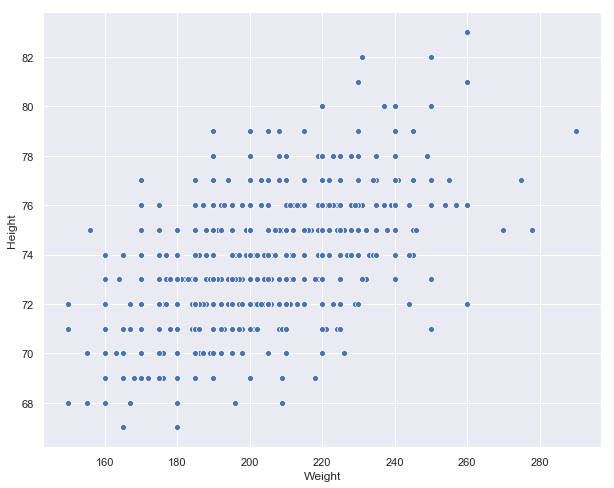

In [20]:
sn.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))

sn.scatterplot(x='Weight', y='Height', data=major_2);

Okay fair enough. There seems to be something of a relationship between height and weight for our players. You may have already learned about *Linear Regression* in another class (Linear Algebra or Calculus 1). We can use seaborn to plot the least squares regression line for these data points.

We will learn some ways later in class of actually compute this line and its slope. It is not important today.

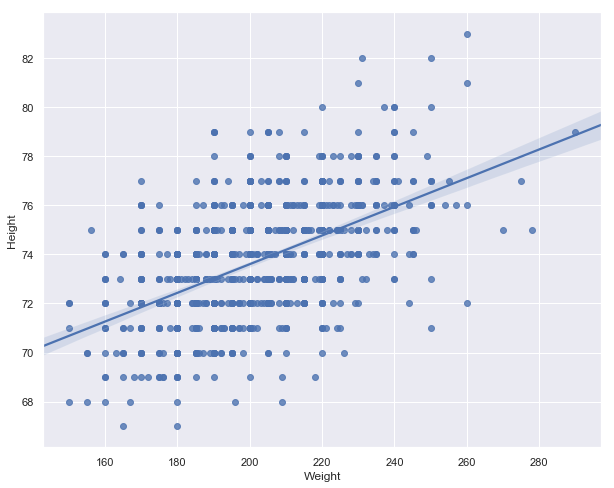

In [21]:
plt.figure(figsize = (10, 8))
sn.set(style = 'darkgrid')
sn.regplot(x='Weight', y='Height', data=major_2);

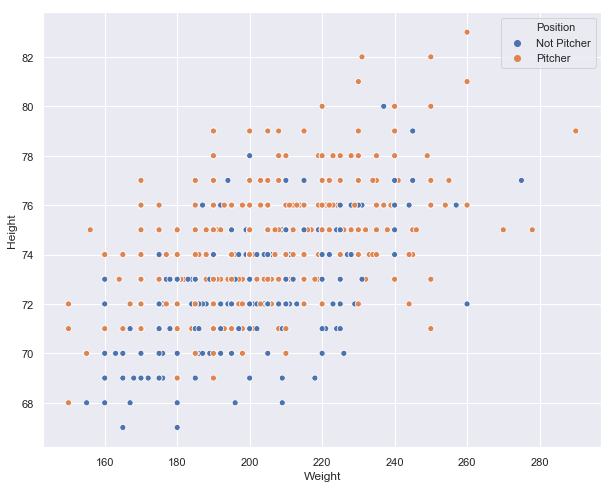

In [19]:
# Let us consider the position of a player in the relationship between Height and Weight.
# What do we notice?

sn.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))

sn.scatterplot(x='Weight', y='Height', hue = 'Position', data=major_2);

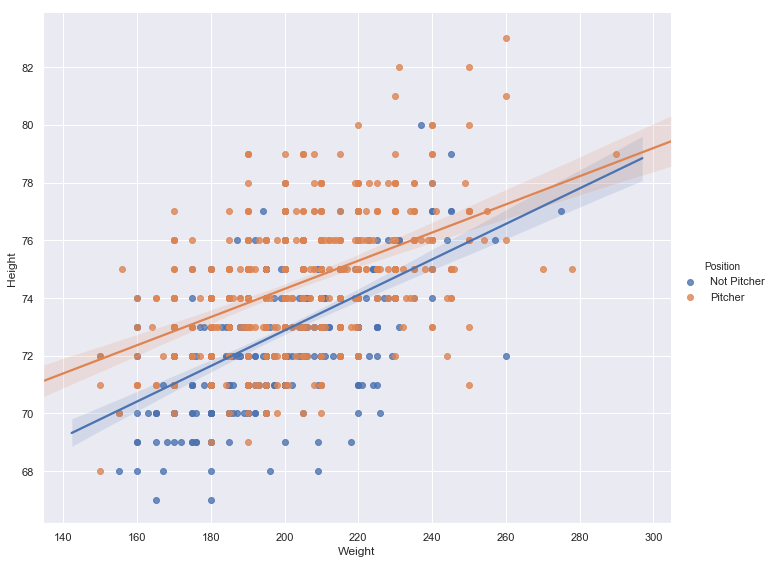

In [20]:
sn.set(style = 'darkgrid')

sn.lmplot(x='Weight', y='Height', hue='Position', data=major_2, height = 8, aspect = 1.2);

# Changing the command to lmplot we can plot a separate fit for Pitchers and Non-Pitchers

# Note that I had to change the size command.

## Second Motivating Example 